Parameter - Drug Concentration Fitting

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [47]:
def hill_p(x, a, n, K, b):
    return a * x**n / (K**n + x**n) + b

def hill_n(x, a, n, K, b):
    return a * K**n / (K**n + x**n) + b
initial_params = [0.5, 2, 0.1, 0.05]

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_25904\3133794217.py:5: RuntimeWarning: invalid value encountered in scalar power
  return a * K**n / (K**n + x**n) + b
d:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_25904\3133794217.py:5: RuntimeWarning: overflow encountered in scalar power
  return a * K**n / (K**n + x**n) + b


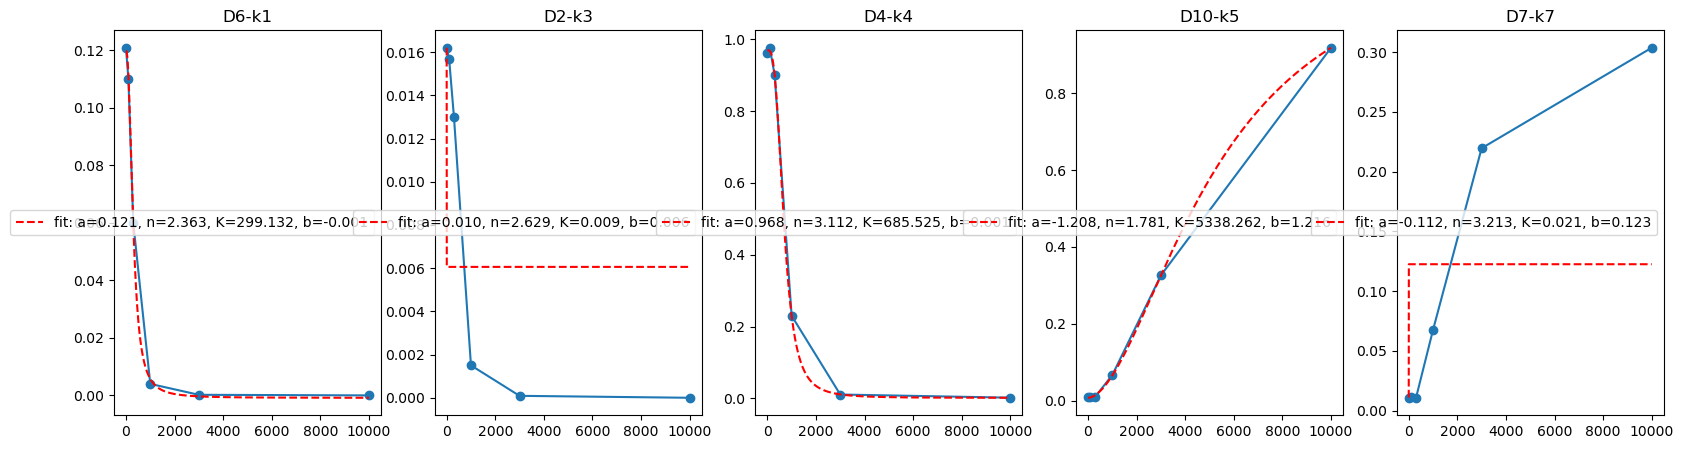

In [52]:
data = pd.read_excel('D:/CQB/会议/2024UQ-Bio/Assignments/UQbio2024_Team3/fig/para_drug.xlsx')
fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
    ax[i].plot(data.iloc[:,0], data.iloc[:,i+1],'o-')
    ax[i].set_title(data.columns[i+1])
    params, params_covariance = curve_fit(hill_n, data.iloc[:,0], data.iloc[:,i+1], p0=initial_params)
    ax[i].plot(np.linspace(0,10000,2001), hill_n(np.linspace(0,10000,2001), *params), 'r--', label='fit: a=%5.3f, n=%5.3f, K=%5.3f, b=%5.3f' % tuple(params))
    ax[i].legend()

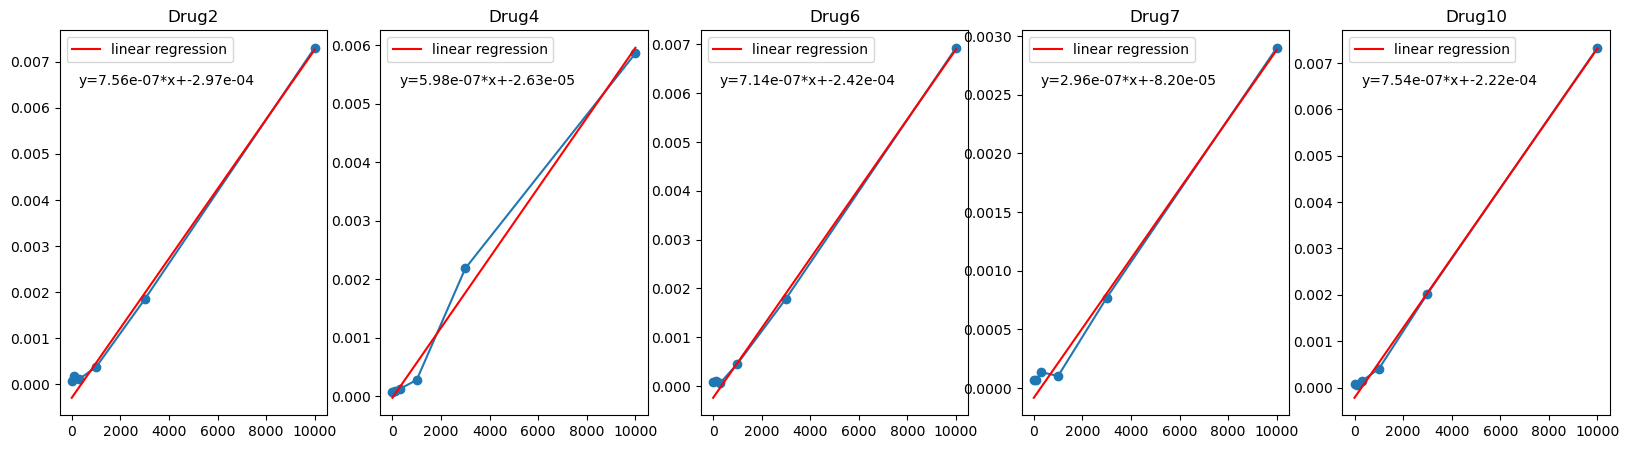

In [41]:
data_vitality = pd.read_excel('D:/CQB/会议/2024UQ-Bio/Assignments/UQbio2024_Team3/fig/vitality_drug.xlsx')
fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
    ax[i].plot(data_vitality.iloc[:,0], data_vitality.iloc[:,i+1], 'o-')
    ax[i].set_title(data_vitality.columns[i+1])
    slope, intercept, _, _, _ = linregress(data_vitality.iloc[2:,0], data_vitality.iloc[2:,i+1])
    ax[i].plot(data_vitality.iloc[:,0], slope*data_vitality.iloc[:,0]+intercept, 'r-', label = 'linear regression')
    ax[i].legend()
    ax[i].text(0.4, 0.85, f'y={slope:.2e}*x+{intercept:.2e}', transform=ax[i].transAxes, ha='center', va='bottom')